# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dropped = df.drop(columns = ['Id','Alley','PoolQC','Fence','MiscFeature'])
dropped.LotFrontage.fillna(dropped.LotFrontage.mean(),inplace = True)
dropped.BsmtQual.fillna(dropped.BsmtQual.describe().top, inplace = True)
dropped.BsmtCond.fillna(dropped.BsmtCond.describe().top, inplace = True)
dropped.BsmtExposure.fillna(dropped.BsmtExposure.describe().top, inplace = True)
dropped.BsmtFinType1.fillna(dropped.BsmtFinType1.describe().top, inplace = True)
dropped.Electrical.fillna(dropped.Electrical.describe().top,inplace = True)
dropped.FireplaceQu.fillna(dropped.FireplaceQu.describe().top,inplace = True)
dropped.GarageType.fillna(dropped.GarageType.describe().top,inplace = True)
dropped.GarageYrBlt.fillna(dropped.GarageYrBlt.mean(),inplace = True)
dropped.GarageFinish.fillna(dropped.GarageFinish.describe().top,inplace = True)
dropped.GarageQual.fillna(dropped.GarageQual.describe().top,inplace = True)
dropped.GarageCond.fillna(dropped.GarageCond.describe().top,inplace = True)
dropped.MasVnrType.fillna(dropped.MasVnrType.describe().top,inplace = True)
dropped.MasVnrArea.fillna(dropped.MasVnrArea.mean(),inplace = True)
dropped.BsmtFinType2 .fillna(dropped.BsmtFinType2 .describe().top,inplace = True)
dropped.isnull().sum().sum()
dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


C:\Users\dakot\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


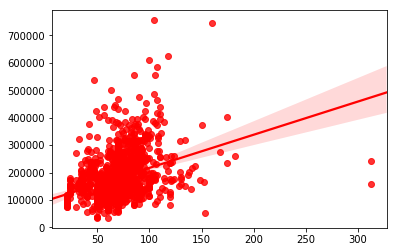

In [4]:
x= dropped['LotFrontage'].values
y = dropped['SalePrice'].values
fig = sns.regplot(x,y, color = 'red')

In [5]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    
encoded = dummyEncode(dropped)
encoded.head()
encoded.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

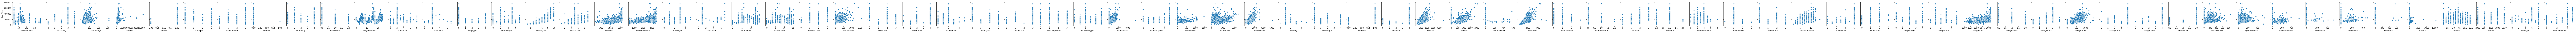

In [6]:
x_columns = encoded.columns.drop('SalePrice')

sns.pairplot(data=encoded, y_vars=['SalePrice'], x_vars=x_columns);

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [7]:
##'Utilities''LandSlope''BldgType''YearBuilt'<(18)'BsmtFinSF1'BsmtFinSF2'BsmtUnfSFTotalBsmtSF<371stFlrSF'2ndFlrSF'<43'LowQualFinSF',
      ## 'GrLivArea'45'BsmtHalfBath'47

In [8]:

features = ['LotShape',  'LotConfig',
       'Neighborhood',  'HouseStyle', 'RoofStyle', 'MasVnrArea', 
       'BsmtExposure', 'BsmtFinType1','BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageType', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold']
X= encoded[features].values
y = dropped['SalePrice'].values
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     100.4
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.00e-220
Time:                        17:41:00   Log-Likelihood:                -17998.
No. Observations:                1460   AIC:                         3.603e+04
Df Residuals:                    1443   BIC:                         3.612e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.289e+05   8362.304     15.412      0.0

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

The P- values in the output table suggest I reject the null. Or in other words the P value returned close to 0 reinforces the choice of that feature.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [9]:
nofly= encoded[(np.abs(stats.zscore(encoded)) < 3).all(axis=1)]
X= nofly[features].values
y = nofly['SalePrice'].values
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     36.20
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           6.91e-77
Time:                        17:41:00   Log-Likelihood:                -7336.7
No. Observations:                 608   AIC:                         1.471e+04
Df Residuals:                     591   BIC:                         1.478e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.426e+05   9891.987     14.420      0.0

All coefficients changed but X1 changed the least. X4 seemed to change the most. 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [10]:
nofly['logPrice'] = np.log(nofly['SalePrice'])

X= nofly[features].values
y2 = nofly['logPrice'].values
X = sm.add_constant(X)

model = sm.OLS(y2, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     36.03
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           1.36e-76
Time:                        17:41:01   Log-Likelihood:                 40.016
No. Observations:                 608   AIC:                            -46.03
Df Residuals:                     591   BIC:                             28.94
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8925      0.053    223.444      0.0

C:\Users\dakot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [11]:
Xi= nofly[features]
vif = [variance_inflation_factor(Xi.values, i) for i in range(Xi.shape[1])]
print(vif)

[2.725814347887428, 4.3493751785081045, 4.532152147793793, 5.776543444269636, 4.3682038898985756, 1.7755108468431537, 4.509642208759541, 3.6439266004492405, 2.391454973326088, 2.8471817850542727, 2.463842949902068, 2.6143541642711545, 2.0179810961091276, 1.940763471504176, 1.1499351528326776, 5.934936648965693]


After isolating and omitting the high VIF values the standard error and coefficients seem to stablize. 

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [12]:
Xi.corr()

,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFullBath,HalfBath,Fireplaces,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold
LotShape,1.000000,0.222072,-0.088224,-0.135756,0.059268,0.007338,0.075922,-0.023438,0.006166,-0.104214,-0.112607,0.073176,-0.105564,-0.081016,0.110398,-0.000244
LotConfig,0.222072,1.000000,-0.049825,-0.037231,0.037181,0.024117,-0.012300,-0.010544,0.032556,-0.072525,-0.027494,-0.033285,0.010880,-0.076413,-0.057092,0.043145
Neighborhood,-0.088224,-0.049825,1.000000,-0.073471,0.141384,0.116629,0.113124,-0.088646,0.096367,-0.052198,0.101878,-0.021269,0.042354,0.056181,0.055750,0.013105
HouseStyle,-0.135756,-0.037231,-0.073471,1.000000,-0.129224,0.082497,-0.138606,0.038291,0.022667,0.542382,0.133288,-0.036702,0.030190,0.137797,-0.166986,0.028326
RoofStyle,0.059268,0.037181,0.141384,-0.129224,1.000000,0.185432,0.024686,-0.020749,0.098257,-0.105171,0.115276,-0.003068,0.052744,-0.043726,-0.034817,0.045580
MasVnrArea,0.007338,0.024117,0.116629,0.082497,0.185432,1.000000,-0.046174,0.013673,0.065686,0.082635,0.229319,-0.167412,0.120305,0.180887,-0.087925,0.049245
BsmtExposure,0.075922,-0.012300,0.113124,-0.138606,0.024686,-0.046174,1.000000,0.087380,-0.197097,0.207847,0.024379,0.116407,-0.174786,0.027283,0.093472,-0.062340
BsmtFinType1,-0.023438,-0.010544,-0.088646,0.038291,-0.020749,0.013673,0.087380,1.000000,-0.487723,0.107792,0.032315,0.022037,-0.014656,0.028032,0.016943,0.027013
BsmtFullBath,0.006166,0.032556,0.096367,0.022667,0.098257,0.065686,-0.197097,-0.487723,1.000000,-0.156492,-0.002044,-0.066586,0.104468,0.031066,0.006677,0.016281
HalfBath,-0.104214,-0.072525,-0.052198,0.542382,-0.105171,0.082635,0.207847,0.107792,-0.156492,1.000000,0.210545,-0.043950,0.036468,0.237887,-0.079493,0.012806


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

After removing all high valued VIF the correlation matrix has much lower values and standard errors are very much improved 

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [13]:
X= nofly[features].values
y2 = nofly['logPrice'].values
X = sm.add_constant(X)

model = sm.OLS(y2, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     47.21
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           1.63e-94
Time:                        17:41:01   Log-Likelihood:                 40.016
No. Observations:                 608   AIC:                            -46.03
Df Residuals:                     591   BIC:                             28.94
Df Model:                          16                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8925      0.051    231.009      0.0

The std Errors did not change very much 

In [14]:
Xi.columns
xcols= ['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath',
       'HalfBath', 'Fireplaces', 'GarageType', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold']

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

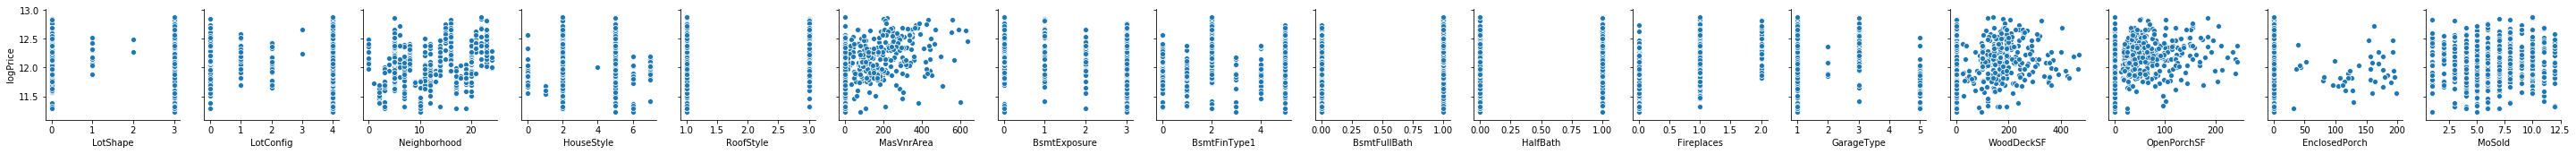

In [15]:
sns.pairplot(data=nofly, y_vars=['logPrice'], x_vars=xcols);

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

C:\Users\dakot\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\dakot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\dakot\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


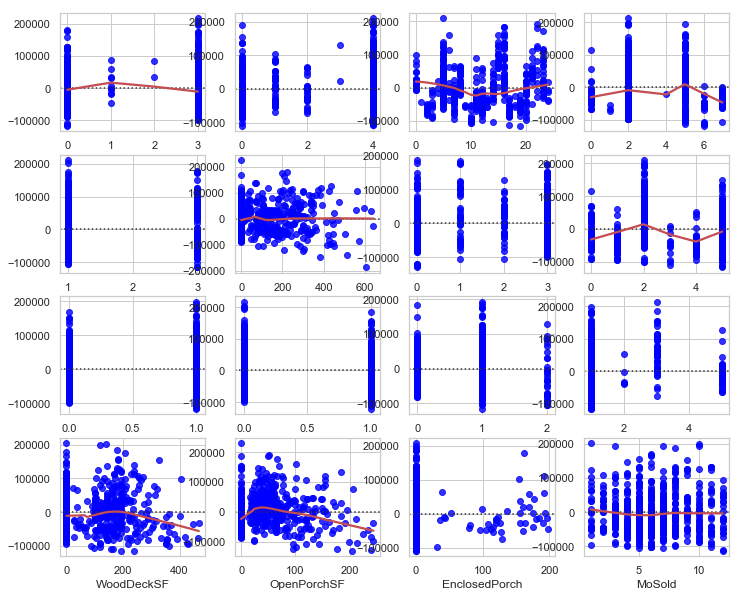

In [36]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(12,10))
sns.residplot(Xi['LotShape'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(Xi['LotConfig'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(Xi['Neighborhood'], y, lowess=True, color="r", ax=axs[0][2], scatter_kws={'color':'blue'})
sns.residplot(Xi['HouseStyle'], y, lowess=True, color="r", ax=axs[0][3], scatter_kws={'color':'blue'})
sns.residplot(Xi['RoofStyle'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(Xi['MasVnrArea'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
sns.residplot(Xi['BsmtExposure'], y, lowess=True, color="r", ax=axs[1][2], scatter_kws={'color':'blue'})
sns.residplot(Xi['BsmtFinType1'], y, lowess=True, color="r", ax=axs[1][3], scatter_kws={'color':'blue'})
sns.residplot(Xi['BsmtFullBath'], y, lowess=True, color="r", ax=axs[2][0], scatter_kws={'color':'blue'})
sns.residplot(Xi['HalfBath'], y, lowess=True, color="r", ax=axs[2][1], scatter_kws={'color':'blue'})
sns.residplot(Xi['Fireplaces'], y, lowess=True, color="r", ax=axs[2][2], scatter_kws={'color':'blue'})
sns.residplot(Xi['GarageType'], y, lowess=True, color="r", ax=axs[2][3], scatter_kws={'color':'blue'})
sns.residplot(Xi['WoodDeckSF'], y, lowess=True, color="r", ax=axs[3][0], scatter_kws={'color':'blue'})
sns.residplot(Xi['OpenPorchSF'], y, lowess=True, color="r", ax=axs[3][1], scatter_kws={'color':'blue'})
sns.residplot(Xi['EnclosedPorch'], y, lowess=True, color="r", ax=axs[3][2], scatter_kws={'color':'blue'})
sns.residplot(Xi['MoSold'], y, lowess=True, color="r", ax=axs[3][3], scatter_kws={'color':'blue'});

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [41]:
##### Your Code Here #####
Xi['pol__open_porch'] =Xi['OpenPorchSF']**2
Xi['pol_masvnrArea'] =Xi['MasVnrArea']**2
Xi['pol_wood_deck'] = Xi['WoodDeckSF']**2
xcols= ['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath',
       'HalfBath', 'Fireplaces', 'GarageType', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold','pol__open_porch','pol_masvnrArea','pol_wood_deck']
X= Xi[xcols].values
y2 = nofly['logPrice'].values
#X = sm.add_constant(X)

model = sm.OLS(y2, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1217.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -1303.2
No. Observations:                 608   AIC:                             2644.
Df Residuals:                     589   BIC:                             2728.
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2535      0.064      3.975      0.0

C:\Users\dakot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dakot\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dakot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
=============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8925      0.051    231.009      0.000      11.792      11.993
x1            -0.0258      0.007     -3.828      0.000      -0.039      -0.013
x2            -0.0032      0.006     -0.563      0.573      -0.014       0.008
x3             0.0035      0.002      2.110      0.035       0.000       0.007
x4            -0.0200      0.007     -2.875      0.004      -0.034      -0.006
x5             0.0111      0.014      0.814      0.415      -0.016       0.038
x6             0.0005   8.59e-05      5.575      0.000       0.000       0.001
x7            -0.0509      0.008     -6.088      0.000      -0.067      -0.035
x8             0.0354      0.006      6.243      0.000       0.024       0.047
x9             0.1107      0.022      5.125      0.000       0.068       0.153
x10            0.1136      0.027      4.233      0.000       0.061       0.166
x11            0.1243      0.018      6.773      0.000       0.088       0.160
x12           -0.0327      0.006     -5.147      0.000      -0.045      -0.020
x13            0.0002   9.25e-05      2.629      0.009    6.19e-05       0.000
x14            0.0015      0.000      6.957      0.000       0.001       0.002
x15           -0.0002      0.000     -0.807      0.419      -0.001       0.000
x16            0.0022      0.004      0.572      0.568      -0.005       0.010
==============================================================================
Omnibus:                        7.376   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.251
Skew:                          -0.250   Prob(JB):                       0.0266
Kurtosis:                       3.192   Cond. No.                     1.13e+03
==============================================================================
